In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
label2fancy = {
    "SVD weight" : r"$SVD_{wPPMI}$",
    "SVD none" : r"$SVD_{PPMI}$, none.",
    "SVD prob" : r"$SVD_{PPMI}$, prob.",
    "SGNS": r"SGNS",
    "GloVe": r"GloVe"
}

In [19]:
def plot(method2values, ylabel, title, name=None, bottom=False, high=False):# create plot 
    matplotlib.rcParams.update({'font.size': 20, "font.family" : "Times New Roman" })
    n_values = len(list(method2values.values())[0])
    index = np.arange(0, n_values * 3, 3)
    bar_width = 0.5
    opacity = 0.8
    
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(14, 4.5)
    offset = -2 * bar_width
    
    #patterns = ('***', "o o o", ". . . .", '/ / / /', '\\ \\ \\ \\')
    greys = ["0", "0.35", "0.6", "0.85", "1"]
    colors = ["#004480", "#3090ca", "#7bccc4","#bbe9bf","#f3fbea",]
    alpha = [1., 0.7, 0.5, 0.3, 0.1]
    i=0
    for method, values in method2values.items():
        plt.bar(index+offset, values, bar_width, label=label2fancy[method],
                #alpha=alpha[i%len(greys)],
                edgecolor='black',
                color=colors[i%len(greys)], 
                #fill=False, 
                #hatch=patterns[i%len(patterns)]
        )
        offset += bar_width
        i+=1
    #plt.xlabel('Corpora')
    plt.ylabel(ylabel)
    #plt.title(title)
    plt.xticks(index, corpora)
    if bottom:
        plt.legend(loc="lower center", mode="expand", borderaxespad=-4, ncol=5)
    else:  
        if high:
            plt.legend(bbox_to_anchor=(1.0,1), ncol=1)
        else:
            plt.legend(bbox_to_anchor=(1.0,0.43), ncol=2)
    #plt.legend(loc=9, bbox_to_anchor=(0.5, -0.075), ncol=5)
    #plt.legend(loc=9, bbox_to_anchor=(0.5, -0.075), ncol=5)
    plt.show()
    if not name:
        name=ylabel
    fig.savefig(name+".png", dpi=300, bbox_inches="tight")

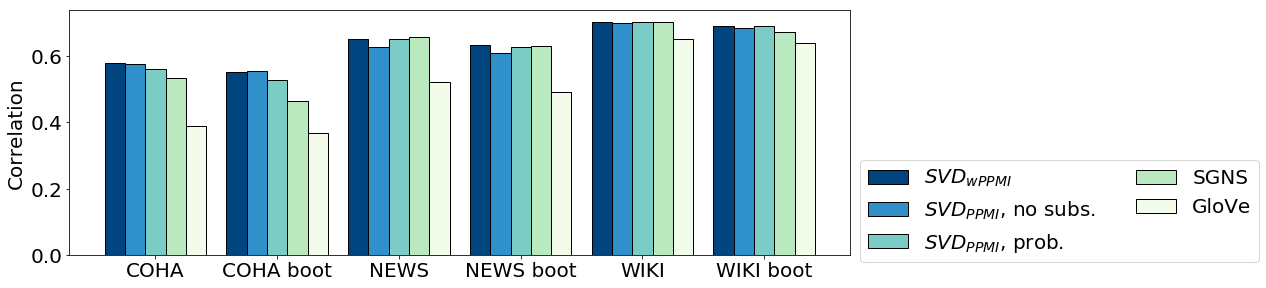

In [122]:
ws353 = """Method/Corpus	COHA	COHA boot	NEWS	NEWS boot	WIKI	WIKI boot
SVD weight	0.579	0.553	0.652	0.634	0.702	0.689
SVD none	0.576	0.554	0.628	0.608	0.700	0.684
SVD prob	0.562	0.527	0.650	0.627	0.703	0.691
SGNS	0.535	0.464	0.656	0.631	0.702	0.671
GloVe	0.390	0.367	0.521	0.492	0.652	0.640"""

corpora = ws353.split("\n")[0].split("\t")[1:]
ws2values = {}
for line in ws353.split("\n")[1:]:
    method, c1, c2, c3, c4, c5, c6 = line.split("\t")
    ws2values[method] = [float(x) for x in [c1, c2, c3, c4, c5, c6]]
plot(ws2values, "Correlation", 'Word Similarity Performance', name="correlation")
#plot(ws2values, "Correlation", 'Word Similarity Performance', name="correlation", patterned=True)



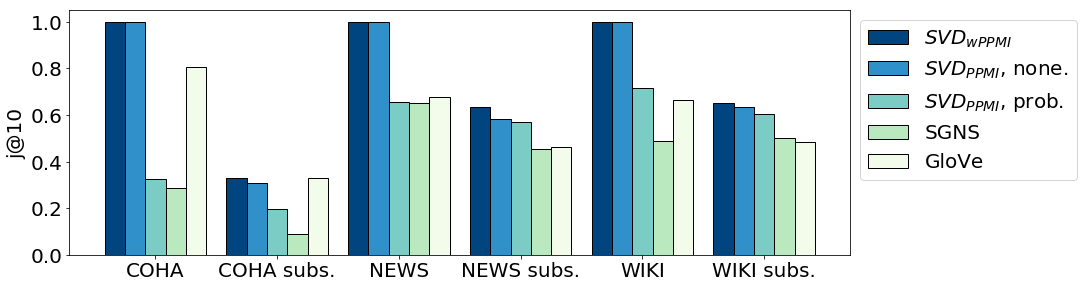

In [20]:
reliability="""Method/Corpus	COHA	COHA subs.	NEWS	NEWS subs.	WIKI	WIKI subs.
SVD weight	1.000	0.329	1.000	0.635	1.000	0.651
SVD none	1.000	0.310	1.000	0.584	1.000	0.635
SVD prob	0.324	0.198	0.654	0.571	0.714	0.604
SGNS	0.288	0.091	0.652	0.452	0.488	0.501
GloVe	0.808	0.330	0.679	0.461	0.666	0.486"""

corpora = reliability.split("\n")[0].split("\t")[1:]
rel2values = {}
for line in reliability.split("\n")[1:]:
    method, c1, c2, c3, c4, c5, c6 = line.split("\t")
    rel2values[method] = [float(x) for x in [c1, c2, c3, c4, c5, c6]]
plot(rel2values, "j@10", "Reliability", name="reliability", high=True) 

In [44]:
def plot(method2values, ylabel, title, name=None):# create plot 
    matplotlib.rcParams.update({'font.size': 20, "font.family" : "Times New Roman" })
    n_values = len(list(method2values.values())[0])
    index = np.arange(0, n_values * 3, 3)
    bar_width = 0.5
    opacity = 0.8
    
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(14, 4.5)
    offset = -2 * bar_width
    
    #patterns = ('***', "o o o", ". . . .", '/ / / /', '\\ \\ \\ \\')
    greys = ["0", "0.35", "0.6", "0.85", "1"]
    colors = ["#004480", "#3090ca", "#7bccc4","#bbe9bf","#f3fbea",]
    alpha = [1., 0.7, 0.5, 0.3, 0.1]
    i=0
    for method, values in method2values.items():
        means = [x[0] for x in values]
        stds = [x[1] for x in values]
        plt.bar(index+offset, means, bar_width, label=label2fancy[method],
                #alpha=alpha[i%len(greys)],
                edgecolor='black',
                color=colors[i%len(greys)], 
                yerr = stds
                #fill=False, 
                #hatch=patterns[i%len(patterns)]
        )
        offset += bar_width
        i+=1
    #plt.xlabel('Corpora')
    plt.ylabel(ylabel)
    #plt.title(title)
    plt.xticks(index, corpora)
    plt.legend(loc="upper center",
                mode="expand", borderaxespad=-2.5, ncol=5)
    #plt.legend(loc=9, bbox_to_anchor=(0.5, -0.075), ncol=5)
    #plt.legend(loc=9, bbox_to_anchor=(0.5, -0.075), ncol=5)
    plt.show()
    if not name:
        name=ylabel
    fig.savefig(name+".png", dpi=300, bbox_inches="tight")

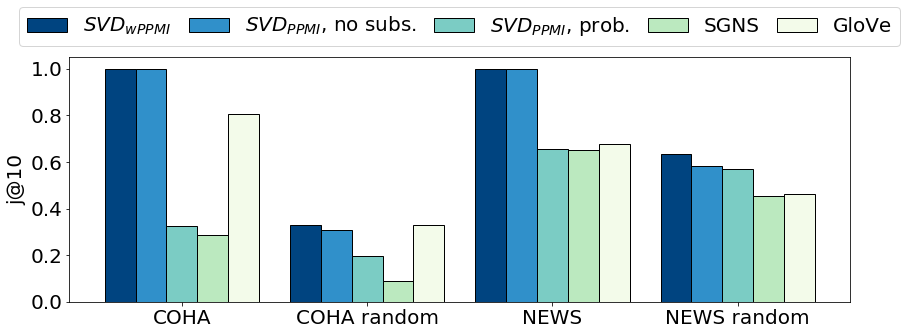

In [11]:
reliability2="""Method/Corpus	COHA	COHA random	NEWS	NEWS random
SVD weight	1.000	0.329	1.000	0.635
SVD none	1.000	0.310	1.000	0.584
SVD prob	0.324	0.198	0.654	0.571
SGNS	0.288	0.091	0.652	0.452
GloVe	0.808	0.330	0.679	0.461"""

corpora = reliability2.split("\n")[0].split("\t")[1:]
rel2values = {}
for line in reliability2.split("\n")[1:]:
    method, c1, c2, c3, c4 = line.split("\t")
    rel2values[method] = [float(x) for x in [c1, c2, c3, c4]]
plot(rel2values, "j@10", "Reliability", name="reliability", bottom=True) 

{'SVD weight': [(1.0, 0.0), (0.328571309313, 0.0007654226021337336)], 'SVD none': [(1.0, 0.0), (0.31037039383240006, 0.0022870220997497958)], 'SVD prob': [(0.3243989126155, 0.0006582086400065347), (0.1980891408105, 0.00045357848830986113)], 'SGNS': [(0.28832152692959995, 0.001953589701144227), (0.09078294058281, 0.0010651950555543598)], 'GloVe': [(0.8077910639196999, 0.0005689557210973563), (0.3301669983307, 0.0010346356145949245)]}


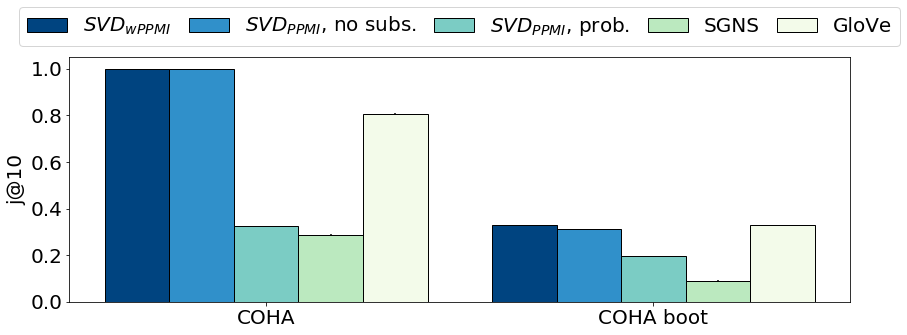

In [45]:
reliability="""Method/Corpus	COHA	COHA boot
SVD weight	1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0	0.327175733656 0.329374143579 0.328570754908 0.327411070685 0.329402750596 0.328608891966 0.328957329606 0.329390932346 0.328832243516 0.327989242272
SVD none	1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0	0.310440210969 0.309465048443 0.30963567191 0.308716500684 0.309634963605 0.308755250172 0.310041469682 0.309059612817 0.316910621177 0.311044588865
SVD prob	0.324402693832 0.325236273458 0.3246266565 0.325491645299 0.323538122664 0.324248680085 0.324725966542 0.323187913707 0.324185889284 0.324345284784	0.198589114154 0.198284895418 0.198399029181 0.198683768413 0.198174858184 0.197778893302 0.19736786676 0.19847158409 0.197494001345 0.197647397258
SGNS	0.288596127797 0.287854441373 0.285240411886 0.289700368767 0.288015246999 0.286420936787 0.292004707642 0.288202830925 0.2864632632 0.29071693392	0.0901229221073 0.0924257175645 0.0930294285973 0.0903548184635 0.0903265968888 0.0902086191267 0.0902203339655 0.0898051528291 0.0914245166254 0.08991129966
GloVe	0.80704182778 0.807603722503 0.807990978792 0.807434961117 0.807833630095 0.807070464095 0.807695492498 0.809107428193 0.808238695455 0.807893438669	0.330129402572 0.33070471373 0.330304870134 0.330564120561 0.33127584777 0.328655192859 0.33156559024 0.328505913011 0.330966734675 0.328997597755"""

corpora = reliability.split("\n")[0].split("\t")[1:]
rel2values = {}
for line in reliability.split("\n")[1:]:
    method, c1, c2 = line.split("\t")
    foo = [[float(y) for y in x.split()] for x in [c1, c2]]
    rel2values[method] = [(np.mean(x), np.std(x)) for x in foo]
print(rel2values)
plot(rel2values, "j@10", "Reliability", name="reliability") 